# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
! git clone https://github.com/ds3001f25/wrangling_assignment.git

Cloning into 'wrangling_assignment'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 8 (from 1)
Receiving objects: 100% (11/11), 5.83 MiB | 17.42 MiB/s, done.


In [3]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

In [4]:
airbnb_df = pd.read_csv('wrangling_assignment/data/airbnb_hw.csv',low_memory=False)

In [5]:
price_list = airbnb_df['Price'].tolist()
cleaned_price_list = []
for each in price_list:
  if "," in each:
    comma = each.index(',')
    cleaned_each = each[:comma] + each[comma+1:]
    cleaned_price_list.append(int(cleaned_each))
  else:
      cleaned_price_list.append(int(each))
airbnb_df['Price'] = cleaned_price_list
# Since this is a numerical variable, I wanted to turn the values of the Price column into integers. However, since some
#of them have commas if the value is over 1000, I first had to get rid of the commas before turning them into integers
#There were no missing values.

In [6]:
police_df = pd.read_csv('wrangling_assignment/data/mn_police_use_of_force.csv',low_memory=False)

In [7]:
police_df = pd.read_csv('wrangling_assignment/data/mn_police_use_of_force.csv',low_memory=False)
police_df['subject_injury']

,subject_injury
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
12920,NaN
12921,NaN
12922,NaN
12923,NaN


In [8]:
police_df['subject_injury_cleaned'] = police_df['subject_injury'].fillna("Missing")
police_df['subject_injury_cleaned'].unique()
values_list = police_df['subject_injury_cleaned'].value_counts().tolist()
missing_proportion = values_list[0] / (values_list[0] + values_list[1] + values_list[2])
print(missing_proportion)
#The proportion of missing values is over 76%, which is very concerning

0.7619342359767892


In [9]:
pd.crosstab(police_df['subject_injury_cleaned'], police_df['force_type'])
#this table is interesting because there are majority missing values in almost every category of force used.
#the major patterns are that when 'less lethal' and 'maximal restraint technique' are used, every result is missing.
#There is not a single definitive answer in either of these categories, which is highly concerning
#The only categories of force that don't have any missing data are 'firearm' and 'less lethal projectile'.
#In general, most types of force have more missing data than not, significantly

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_cleaned,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [26]:

justice_df = justice_df.rename(columns = {'WhetherDefendantWasReleasedPretrial' : 'was_released'})
justice_df['was_released'].unique()
justice_df['was_released'] = justice_df['was_released'].replace([9], np.nan)
print(justice_df['was_released'].value_counts())

was_released
1.0    19154
0.0     3801
Name: count, dtype: int64


In [72]:
justice_df = pd.read_parquet('wrangling_assignment/data/justice_data.parquet')
justice_df = justice_df.rename(columns = {'ImposedSentenceAllChargeInContactEvent' : 'imposed_sentence',
                                          'SentenceTypeAllChargesAtConvictionInContactEvent' : 'sentence_type'})
justice_df[['imposed_sentence', 'sentence_type']].head(30)
#justice_df['sentence_type'].unique()
#After looking at the first 30 values of these 2 columns, I can see that there is only an imposed sentence when the
#sentence type is either 0 or 1. If the sentency type is either 4 or 9, the imposed sentence is missing.
#This leads me to believe that the missing values are not random.

,imposed_sentence,sentence_type
0,,9
1,60,0
2,12,1
3,.985626283367556,1
4,,4
5,12,0
6,36,1
7,6,0
8,24,1
9,12,1


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Axes(0.125,0.11;0.775x0.77)


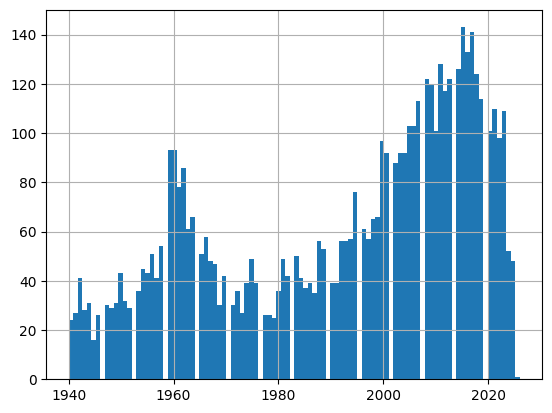

In [78]:
from copyreg import clear_extension_cache
shark_df = pd.read_excel('GSAF5.xls')
pd.set_option('display.max_columns', None)
shark_df = shark_df.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
cleaned_year = []
shark_df['Year'] = shark_df['Year'].fillna("Unknown")
shark_df["Year"].unique()
for each in shark_df['Year']:
  if each == 0:
    cleaned_year.append('Unknown')
  elif type(each) == float:
    cleaned_year.append(int(each))
  elif type(each) == str:
    cleaned_year.append(each)
shark_df['Year'] = cleaned_year
#There are values ranging from 2025 to nan to 1500 to 0. To clean this, I replaced both nan and 0 with unknown. In most of
#the cases where 0 was the year, it gave a range that was not exact, so I decided 'unknown' was clearer than a false year
shark_df_filtered = shark_df[shark_df['Year'] != 'Unknown']
shark_df_filtered = shark_df_filtered[shark_df_filtered['Year'] >= 1940]
print(shark_df_filtered['Year'].hist(bins=100))
#Up until the last few years, shark attacks had been steadily increasing since the late 1970s. However, there has been a
#steep drop offin attacks in the last 5 years.

Axes(0.125,0.11;0.775x0.77)


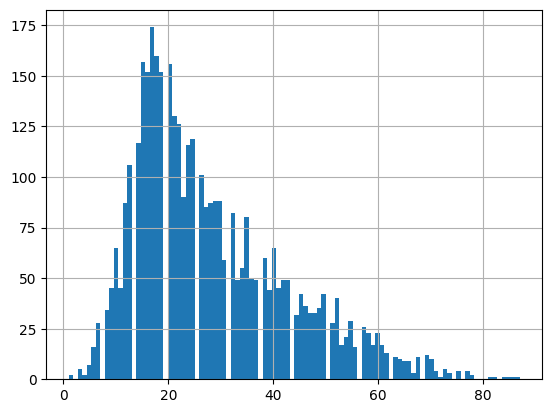

In [79]:
shark_df = pd.read_excel('GSAF5.xls')
shark_df = shark_df.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
shark_df['Age'] = shark_df['Age'].fillna("Unknown")
shark_df['Age'].unique()
age_cleaned = []
for each in shark_df['Age']:
  try:
    age_cleaned.append(int(each))
  except:
    age_cleaned.append('Unknown')
shark_df['Age'] = age_cleaned
shark_df_filtered = shark_df[shark_df['Age'] != 'Unknown']
print(shark_df_filtered['Age'].hist(bins=100))

In [97]:
shark_df = pd.read_excel('GSAF5.xls')
shark_df = shark_df.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
shark_df['Sex'].unique()
sex_cleaned = []
for each in shark_df['Sex']:
  try:
    each = each.strip()
  except:
    pass
  if each == 'M' or each == 'm':
    sex_cleaned.append('Male')
  elif each == 'F' or each == 'f':
    sex_cleaned.append('Female')
  else:
    sex_cleaned.append('Unknown')
shark_df['Sex'] = sex_cleaned
count_by_sex = shark_df['Sex'].value_counts().tolist()
male_victim_proportion = count_by_sex[0] / (count_by_sex[0] + count_by_sex[1] + count_by_sex[2])
print(male_victim_proportion)
#Roughly 80% of victims are male

0.8026128940641863


In [102]:
shark_df = pd.read_excel('GSAF5.xls')
shark_df = shark_df.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
shark_df['Type'].unique()
shark_df['Type'] = shark_df['Type'].fillna("Unknown")
type_cleaned = []
for each in shark_df['Type']:
  each = each.strip()
  each = each.lower()
  if each == 'provoked':
    type_cleaned.append('Provoked')
  elif each == 'unprovoked':
    type_cleaned.append('Unprovoked')
  else:
    type_cleaned.append('Unknown')
shark_df['Type'] = type_cleaned
count_by_type = shark_df['Type'].value_counts()
unprovoked_proportion = count_by_type[0] / (count_by_type[0] + count_by_type[1] + count_by_type[2])
print(unprovoked_proportion)
#Roughly 73.8% of attacks are unprovoked

0.7380005680204488


/tmp/ipython-input-2069370850.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  unprovoked_proportion = count_by_type[0] / (count_by_type[0] + count_by_type[1] + count_by_type[2])


In [107]:
from logging import fatal
shark_df = pd.read_excel('GSAF5.xls')
shark_df = shark_df.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
shark_df['Fatal Y/N'].unique()
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].fillna('Unknown')
fatal_cleaned = []
for each in shark_df['Fatal Y/N']:
  if type(each) == float or type(each) == int:
    fatal_cleaned.append('Unknown')
    continue
  each = each.strip()
  each = each.lower()
  if each == 'y':
    fatal_cleaned.append('Y')
  elif each == 'n':
    fatal_cleaned.append('N')
  else:
    fatal_cleaned.append('Unknown')
shark_df['Fatal Y/N'] = fatal_cleaned
shark_df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
7038,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
7039,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
7040,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
